In [2]:
# run this cell

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import trafficFeaturing as tf

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# Always make it pretty.
plt.style.use('ggplot')


In [3]:
#run this cell
traffic = tf.clean_data(tf.load_data())
traffic.shape

(275383, 21)

In [ ]:
#diagnostic cell, no need to run
traffic.iloc[:5,:20]


In [3]:
#run this cell
traffic = tf.add_previous(traffic,traffic.columns[3:])




In [53]:
#diagnostic cell, no need to run
traffic.columns

Index(['AADFYear', 'CP', 'Estimation_method', 'Estimation_method_detailed',
       'PedalCycles', 'Motorcycles', 'CarsTaxis', 'BusesCoaches',
       'LightGoodsVehicles', 'V2AxleRigidHGV', 'V3AxleRigidHGV',
       'V4or5AxleRigidHGV', 'V3or4AxleArticHGV', 'V5AxleArticHGV',
       'V6orMoreAxleArticHGV', 'AllHGVs', 'AllMotorVehicles', 'Lat', 'Lon',
       'previous_LinkLength_miles', 'previous_PedalCycles',
       'previous_Motorcycles', 'previous_CarsTaxis', 'previous_BusesCoaches',
       'previous_LightGoodsVehicles', 'previous_V2AxleRigidHGV',
       'previous_V3AxleRigidHGV', 'previous_V4or5AxleRigidHGV',
       'previous_V3or4AxleArticHGV', 'previous_V5AxleArticHGV',
       'previous_V6orMoreAxleArticHGV', 'previous_AllHGVs',
       'previous_AllMotorVehicles', 'previous_Lat', 'previous_Lon',
       'LinkLength_miles', 'RoadCategory_PM', 'RoadCategory_PR',
       'RoadCategory_PU', 'RoadCategory_Pu', 'RoadCategory_TM',
       'RoadCategory_TR', 'RoadCategory_TU', 'RoadCategory_Tu'

In [4]:
#run this cell
#reorders columns so slicing out features, non-features, and targets is easier later on
cols = traffic.columns.tolist()
cols = cols[:5] + cols[6:] + [cols[5]]
traffic = traffic[cols]
# traffic.columns

In [ ]:
#traffic flow of zero had to be removed
# traffic[traffic['CP'] == 80207]

In [ ]:

traf_2000 = traffic[traffic['AADFYear'] > 2000]
traf_2000_estimated = traf_2000[traf_2000['Estimation_method_detailed'] == "Estimated using previous year's AADF on this link"]

growth_factors = (traf_2000_estimated['AllMotorVehicles'] - traf_2000_estimated['previous_AllMotorVehicles']) / traf_2000_estimated['AllMotorVehicles']

print(np.min(growth_factors),np.max(growth_factors))

In [ ]:

traf_2000_estimated[growth_factors == 0.9874739039665971]
#diagnostic cell, no need to run

In [ ]:

traf_2000_estimated[traf_2000_estimated['CP'] == 80212]
#diagnostic cell, no need to run

In [ ]:

traf_2000_estimated[growth_factors == -1.8542015800813982]
#diagnostic cell, no need to run

In [ ]:

traf_2000_estimated[traf_2000_estimated['CP'] == 50712]
#diagnostic cell, no need to run

In [ ]:

traf_2000_estimated.head()
#diagnostic cell, no need to run

In [ ]:

traf_2000_estimated[traf_2000_estimated['CP'] == 501]
#diagnostic cell, no need to run

In [ ]:

truths = np.zeros(len(growth_factors))
for i,g in enumerate(growth_factors):
    if g >.05:
        truths[i] = 1
    elif g < -.05:
        truths[i] = 1
truths.sum()/len(truths)
#diagnostic cell, no need to run

In [ ]:

traffic.head()
#diagnostic cell, no need to run

In [ ]:
#old code, do NOT run
y = traffic[['AADFYear','CP','Estimation_method', 'Estimation_method_detailed','AllMotorVehicles']]

#subsets of data
traffic_estimated = traffic[traffic['Estimation_method'] == 'Estimated']
traffic_counted = traffic[traffic['Estimation_method'] == 'Counted']
traffic_after2000 = traffic[traffic['AADFYear'] > 2000]
y_estimated = traffic_estimated[['AADFYear','CP','Estimation_method', 'Estimation_method_detailed','AllMotorVehicles']]
y_counted = traffic_counted[['AADFYear','CP','Estimation_method', 'Estimation_method_detailed','AllMotorVehicles']]
y_after2000 = traffic_after2000[['AADFYear','CP','Estimation_method', 'Estimation_method_detailed','AllMotorVehicles']]

cols_to_drop = ['Estimation_method', 'Estimation_method_detailed','PedalCycles', 'Motorcycles', 'CarsTaxis',
       'BusesCoaches', 'LightGoodsVehicles', 'V2AxleRigidHGV',
       'V3AxleRigidHGV', 'V4or5AxleRigidHGV', 'V3or4AxleArticHGV',
       'V5AxleArticHGV', 'V6orMoreAxleArticHGV', 'AllHGVs', 'AllMotorVehicles']
traffic = traffic.drop(cols_to_drop,axis=1)
traffic_estimated = traffic_estimated.drop(cols_to_drop,axis=1)
traffic_counted = traffic_counted.drop(cols_to_drop,axis=1)
traffic_after2000 = traffic_after2000.drop(cols_to_drop,axis=1)

In [5]:
#run this cell
y = traffic[['AADFYear','CP','Estimation_method', 'Estimation_method_detailed','AllMotorVehicles']]
categorical_columns = ['RoadCategory', 'previous_Estimation_method_detailed', 'previous_RoadCategory','AADFYear'] 
traffic = pd.get_dummies(traffic,columns=categorical_columns)

traffic['AADFYear'] = y['AADFYear']
cols = traffic.columns.tolist()
cols = cols[-1:] + cols[:-1]
traffic = traffic[cols]

traffic_estimated = traffic[traffic['Estimation_method'] == 'Estimated']
traffic_counted = traffic[traffic['Estimation_method'] == 'Counted']
traffic_after2000 = traffic[traffic['AADFYear_2000'] == False]

y_estimated = y[traffic['Estimation_method'] == 'Estimated']
y_counted = y[traffic['Estimation_method'] == 'Counted']
y_after2000 = y[traffic['AADFYear_2000'] == False]



# y_estimated = traffic_estimated[['AADFYear','CP','Estimation_method', 'Estimation_method_detailed','AllMotorVehicles']]
# y_counted = traffic_counted[['AADFYear','CP','Estimation_method', 'Estimation_method_detailed','AllMotorVehicles']]
# y_after2000 = traffic_after2000[['AADFYear','CP','Estimation_method', 'Estimation_method_detailed','AllMotorVehicles']]


In [ ]:
traffic.columns

In [ ]:
cols

In [ ]:
traffic.shape

In [ ]:
traffic_estimated.shape

In [ ]:
traffic_counted.shape

In [ ]:
traffic_after2000.shape

In [ ]:

categorical_columns = ['RoadCategory', 'previous_Estimation_method_detailed', 'previous_RoadCategory','AADFYear'] 
#, 'Road', 'previous Road' ,'StartJunction', 'EndJunction', 'previous StartJunction','previous EndJunction'

In [ ]:
#definitely DO NOT run this cell
traffic = pd.get_dummies(traffic,columns=categorical_columns)
traffic_estimated = pd.get_dummies(traffic_estimated,columns=categorical_columns)
traffic_counted = pd.get_dummies(traffic_counted,columns=categorical_columns)
traffic_after2000 = pd.get_dummies(traffic_after2000,columns=categorical_columns)
traffic_counted['RoadCategory_Tu'] = False
traffic_counted['previous_RoadCategory_Tu'] = False

# feat_engineering.head()

In [ ]:
growth_factors

In [ ]:
traffic_counted.columns

In [ ]:
cols = traffic.columns
cols

In [ ]:
traffic.columns == traffic_counted.columns

In [ ]:
traffic.columns[17:]

In [ ]:
traffic.head()

In [ ]:
np.arange(2000,2017,1)

In [ ]:
traffic.columns

In [10]:
cols = list(traffic.columns[17:18]) + list(traffic.columns[35:44]) + list(traffic.columns[57:])
cols

['Lat',
 'LinkLength_miles',
 'RoadCategory_PM',
 'RoadCategory_PR',
 'RoadCategory_PU',
 'RoadCategory_Pu',
 'RoadCategory_TM',
 'RoadCategory_TR',
 'RoadCategory_TU',
 'RoadCategory_Tu',
 'AADFYear_2000',
 'AADFYear_2001',
 'AADFYear_2002',
 'AADFYear_2003',
 'AADFYear_2004',
 'AADFYear_2005',
 'AADFYear_2006',
 'AADFYear_2007',
 'AADFYear_2008',
 'AADFYear_2009',
 'AADFYear_2010',
 'AADFYear_2011',
 'AADFYear_2012',
 'AADFYear_2013',
 'AADFYear_2014',
 'AADFYear_2015',
 'AADFYear_2016']

In [ ]:
traffic[traffic['AADFYear'] == 2000].previous_RoadCategory_PM

In [6]:
#run this cell
main_train = []
main_test = []
estimated_train = []
estimated_test = []
counted_train = []
counted_test = []

for year in np.arange(2000,2017,1):
    trainer, tester = tf.train_test_splitter(traffic,year)
    trainer2, tester2 = tf.train_test_splitter(traffic_estimated,year)
    trainer3, tester3 = tf.train_test_splitter(traffic_counted,year)
    main_train.append(trainer.values)
    main_test.append(tester.values)
    estimated_train.append(trainer2.values)
    estimated_test.append(tester2.values)
    counted_train.append(trainer3.values)
    counted_test.append(tester3.values)
#train test splitting for final model

main_split = zip(main_train, main_test)
estimated_split = zip(estimated_train, estimated_test)
counted_split = zip(counted_train, counted_test)

In [14]:
traffic.columns[17:]

Index(['Lat', 'Lon', 'previous_LinkLength_miles', 'previous_PedalCycles',
       'previous_Motorcycles', 'previous_CarsTaxis', 'previous_BusesCoaches',
       'previous_LightGoodsVehicles', 'previous_V2AxleRigidHGV',
       'previous_V3AxleRigidHGV', 'previous_V4or5AxleRigidHGV',
       'previous_V3or4AxleArticHGV', 'previous_V5AxleArticHGV',
       'previous_V6orMoreAxleArticHGV', 'previous_AllHGVs',
       'previous_AllMotorVehicles', 'previous_Lat', 'previous_Lon',
       'LinkLength_miles', 'RoadCategory_PM', 'RoadCategory_PR',
       'RoadCategory_PU', 'RoadCategory_Pu', 'RoadCategory_TM',
       'RoadCategory_TR', 'RoadCategory_TU', 'RoadCategory_Tu',
       'previous_Estimation_method_detailed_Automatic counter',
       'previous_Estimation_method_detailed_Dependent on a neighbouring counted link',
       'previous_Estimation_method_detailed_Estimated from nearby links',
       'previous_Estimation_method_detailed_Estimated using previous year's AADF on this link',
       'previ

In [15]:
#run this cell
# X = traffic[cols].values
# X_estimated = traffic_estimated[cols].values
# X_counted = traffic_counted[cols].values
# X_after2000 = traffic_after2000[cols].values

X = traffic.values[:,17:]
X_estimated = traffic_estimated.values[:,17:]
X_counted = traffic_counted.values[:,17:]
X_after2000 = traffic_after2000.values[:,17:]

y_estimated_flow = y_estimated.values[:,4]
y_counted_flow = y_counted.values[:,4]

In [13]:
X[:,0]

array([52.96782625, 52.96782625, 52.96782625, ..., 52.66346055,
       52.66346055, 52.66346055], dtype=object)

In [ ]:
y['Estimation_method_detailed'].value_counts()

In [ ]:
estimated_rows = (y['Estimation_method_detailed'] == 'Manual count') | (y['Estimation_method_detailed'] == 'Automatic counter')

In [ ]:
X.shape

In [ ]:
X_counted.shape

In [ ]:
logregress = LogisticRegression()

In [ ]:
traffic_estimated.head()

In [ ]:
275000/16

In [ ]:
linregress = LinearRegression()

In [ ]:
linregress.fit(X,y['AllMotorVehicles'])
linregress.score(X,y['AllMotorVehicles'])

In [8]:
#run this cell
forest2 = RandomForestRegressor()

In [ ]:
forest = RandomForestClassifier()

In [ ]:
X_estimated

In [16]:
#run this cell
forest2.fit(X_estimated,y_estimated_flow)
forest2.score(X_estimated,y_estimated_flow)

0.9992940805784791

In [17]:
#run this cell
kf = KFold(n_splits = 5,shuffle=True)

In [ ]:


list(kf.split(X_estimated,y_estimated_flow))

0.9966002220070427
0.9953986213738655
0.9964001529862997
0.995956809529218
0.9956763254782838


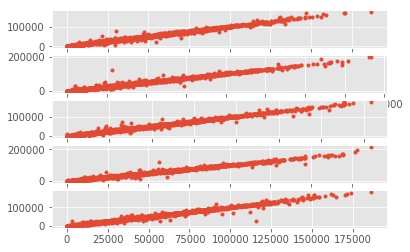

In [18]:
#run this cell
fig, axs = plt.subplots(5)

for i, (train, test) in enumerate(kf.split(X_estimated)):
    forest2.fit(X_estimated[train],y_estimated_flow[train])
    print(forest2.score(X_estimated[test],y_estimated_flow[test]))
    axs[i].plot(forest2.predict(X_estimated[test]),y_estimated_flow[test],".")

In [ ]:
traffic.columns


In [19]:
#run this cell
forest2.fit(X_counted, y_counted_flow)
forest2.score(X_counted, y_counted_flow)

0.9961043114778568

In [20]:
#run this cell
forest2.fit(X_estimated,y_estimated_flow)
forest2.score(X_counted,y_counted_flow)

0.9738967475217769

0.9797890223841788
0.979427752516639
0.9760021729031777
0.9779022321289308
0.9778492918630416


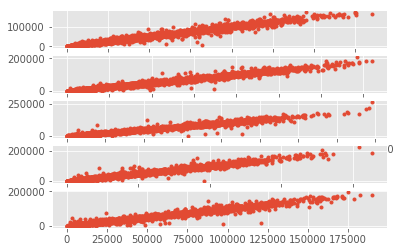

In [21]:
#run this cell
fig, axs = plt.subplots(5)

for i, (train, test) in enumerate(kf.split(X_counted)):
    forest2.fit(X_counted[train],y_counted_flow[train])
    print(forest2.score(X_counted[test],y_counted_flow[test]))
    axs[i].plot(forest2.predict(X_counted[test]),y_counted_flow[test],".")

In [ ]:
len(counted_train[0])

In [ ]:
len(counted_test)

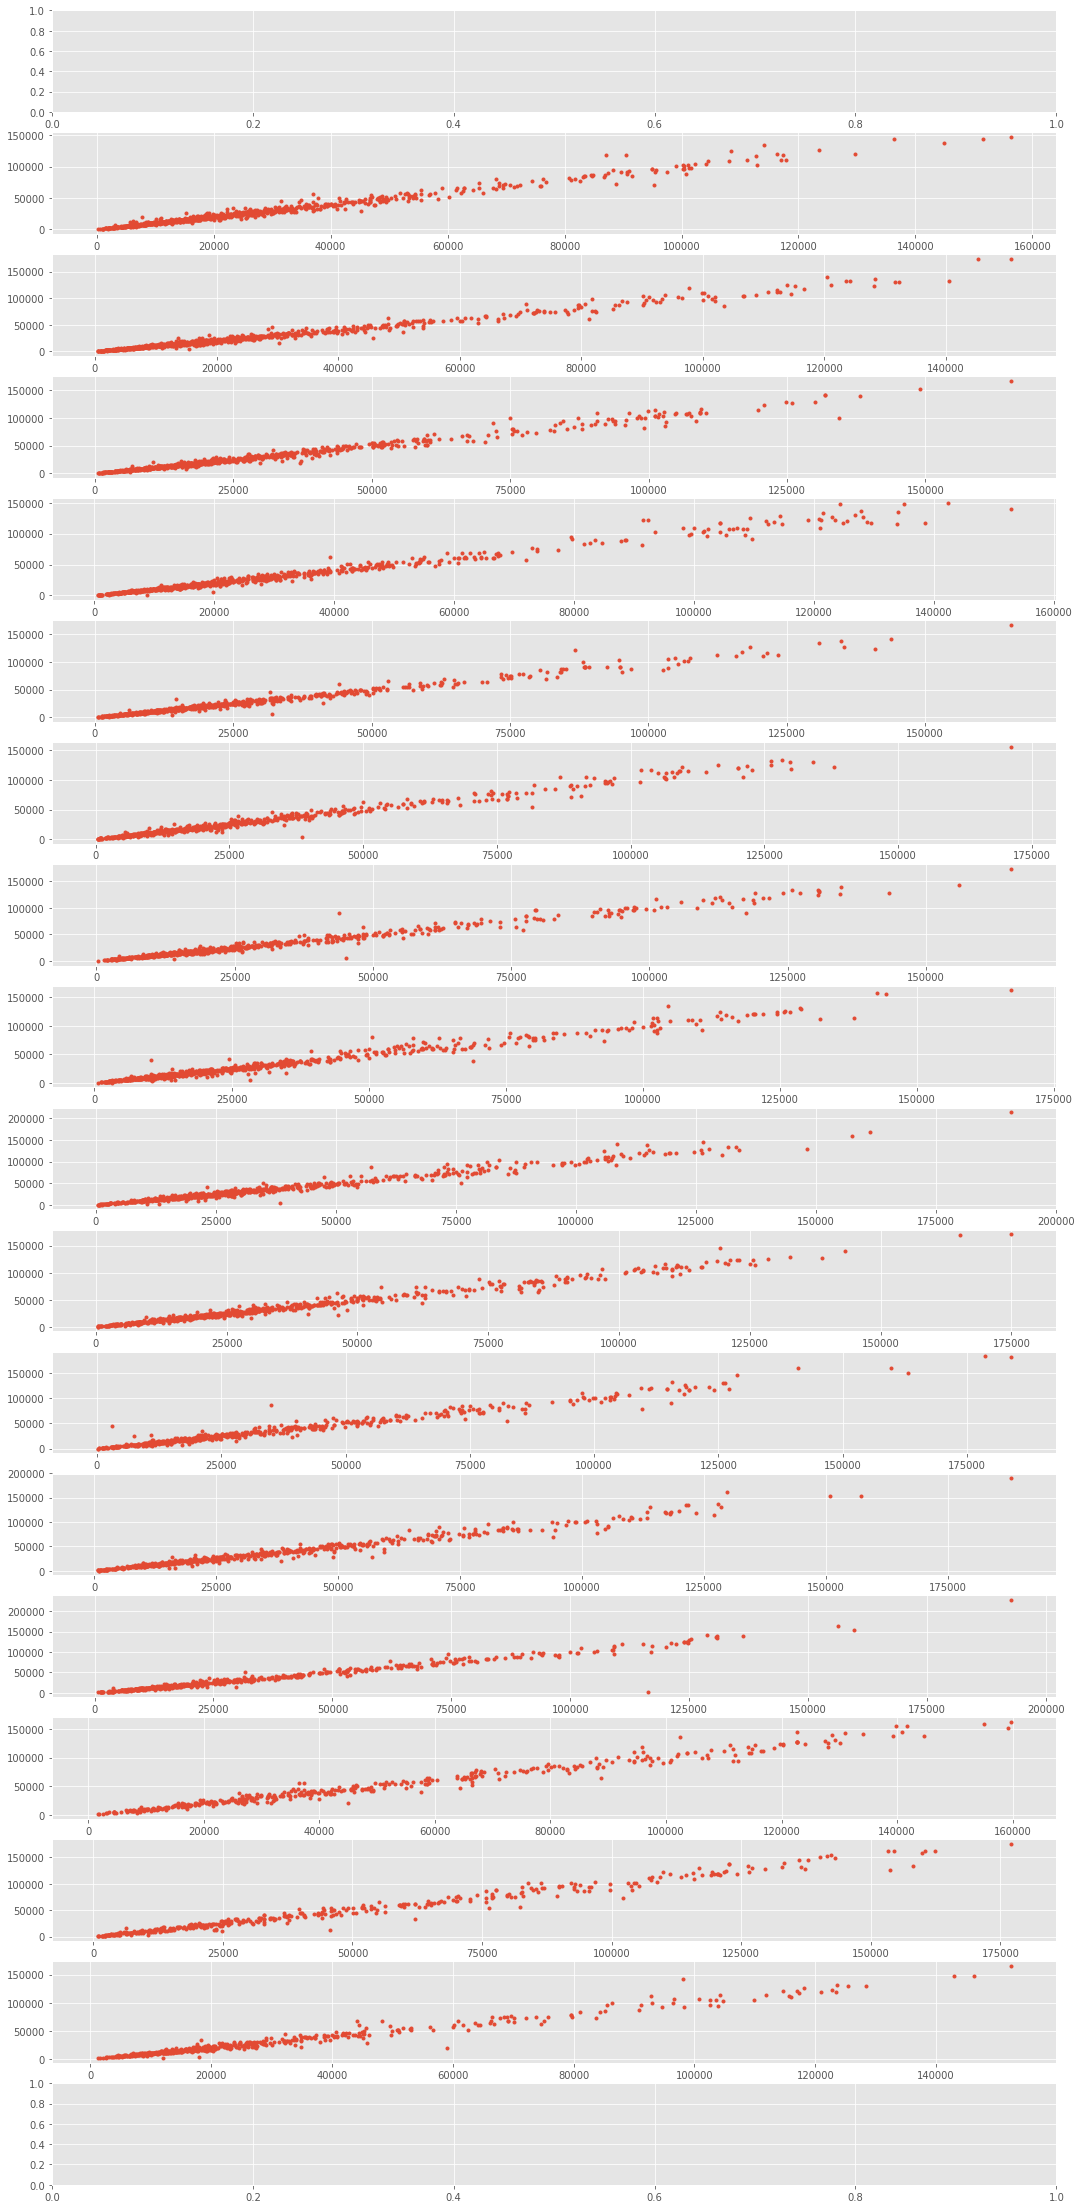

In [28]:

#run this cell
fig, axs = plt.subplots(18, figsize = (18,40))

num_years = len(counted_train)-1
my_model_scores = np.zeros(num_years)

for d in range(num_years):
    i = d+1
    forest2.fit(X_counted[counted_train[i].astype(bool)],y_counted_flow[counted_train[i].astype(bool)])
    my_model_scores[d] = forest2.score(X_counted[counted_test[i].astype(bool)],y_counted_flow[counted_test[i].astype(bool)])
    axs[i].plot(forest2.predict(X_counted[counted_test[i].astype(bool)]),y_counted_flow[counted_test[i].astype(bool)],".")

In [ ]:
for i in range(len(counted_train)):
    print( counted_train[i].sum() + counted_test[i].sum())
#diagnostic cell

In [31]:
#run this cell
my_model_scores

array([0.98034137, 0.98198541, 0.9822282 , 0.98150855, 0.98102876,
       0.98147981, 0.97848905, 0.975527  , 0.97380711, 0.98081753,
       0.97159552, 0.9747589 , 0.96424687, 0.97848301, 0.98021787,
       0.97321194])

In [ ]:
len(X_counted)
#diagnostic cell

In [ ]:
len(counted_test[0])
#diagnostic cell

In [ ]:
forest2.fit(X_counted[counted_train[0].astype(bool)],y_counted_flow[counted_train[0].astype(bool)])
print(forest2.score(X_counted[counted_test[0].astype(bool)],y_counted_flow[counted_test[0].astype(bool)]))
#diagnostic cell

In [ ]:
len(X_counted[counted_train[0]])
#diagnostic cell

In [ ]:
counted_train[0].sum()
#diagnostic cell

In [ ]:
counted_test[0].sum()
#diagnostic cell

In [ ]:
counted_train[0].astype(bool)
#diagnostic cell

In [ ]:
(counted_train[0] | counted_test[0]).sum()
#diagnostic cell

In [ ]:
(X_counted[counted_train[0]])[:5]
#diagnostic cell

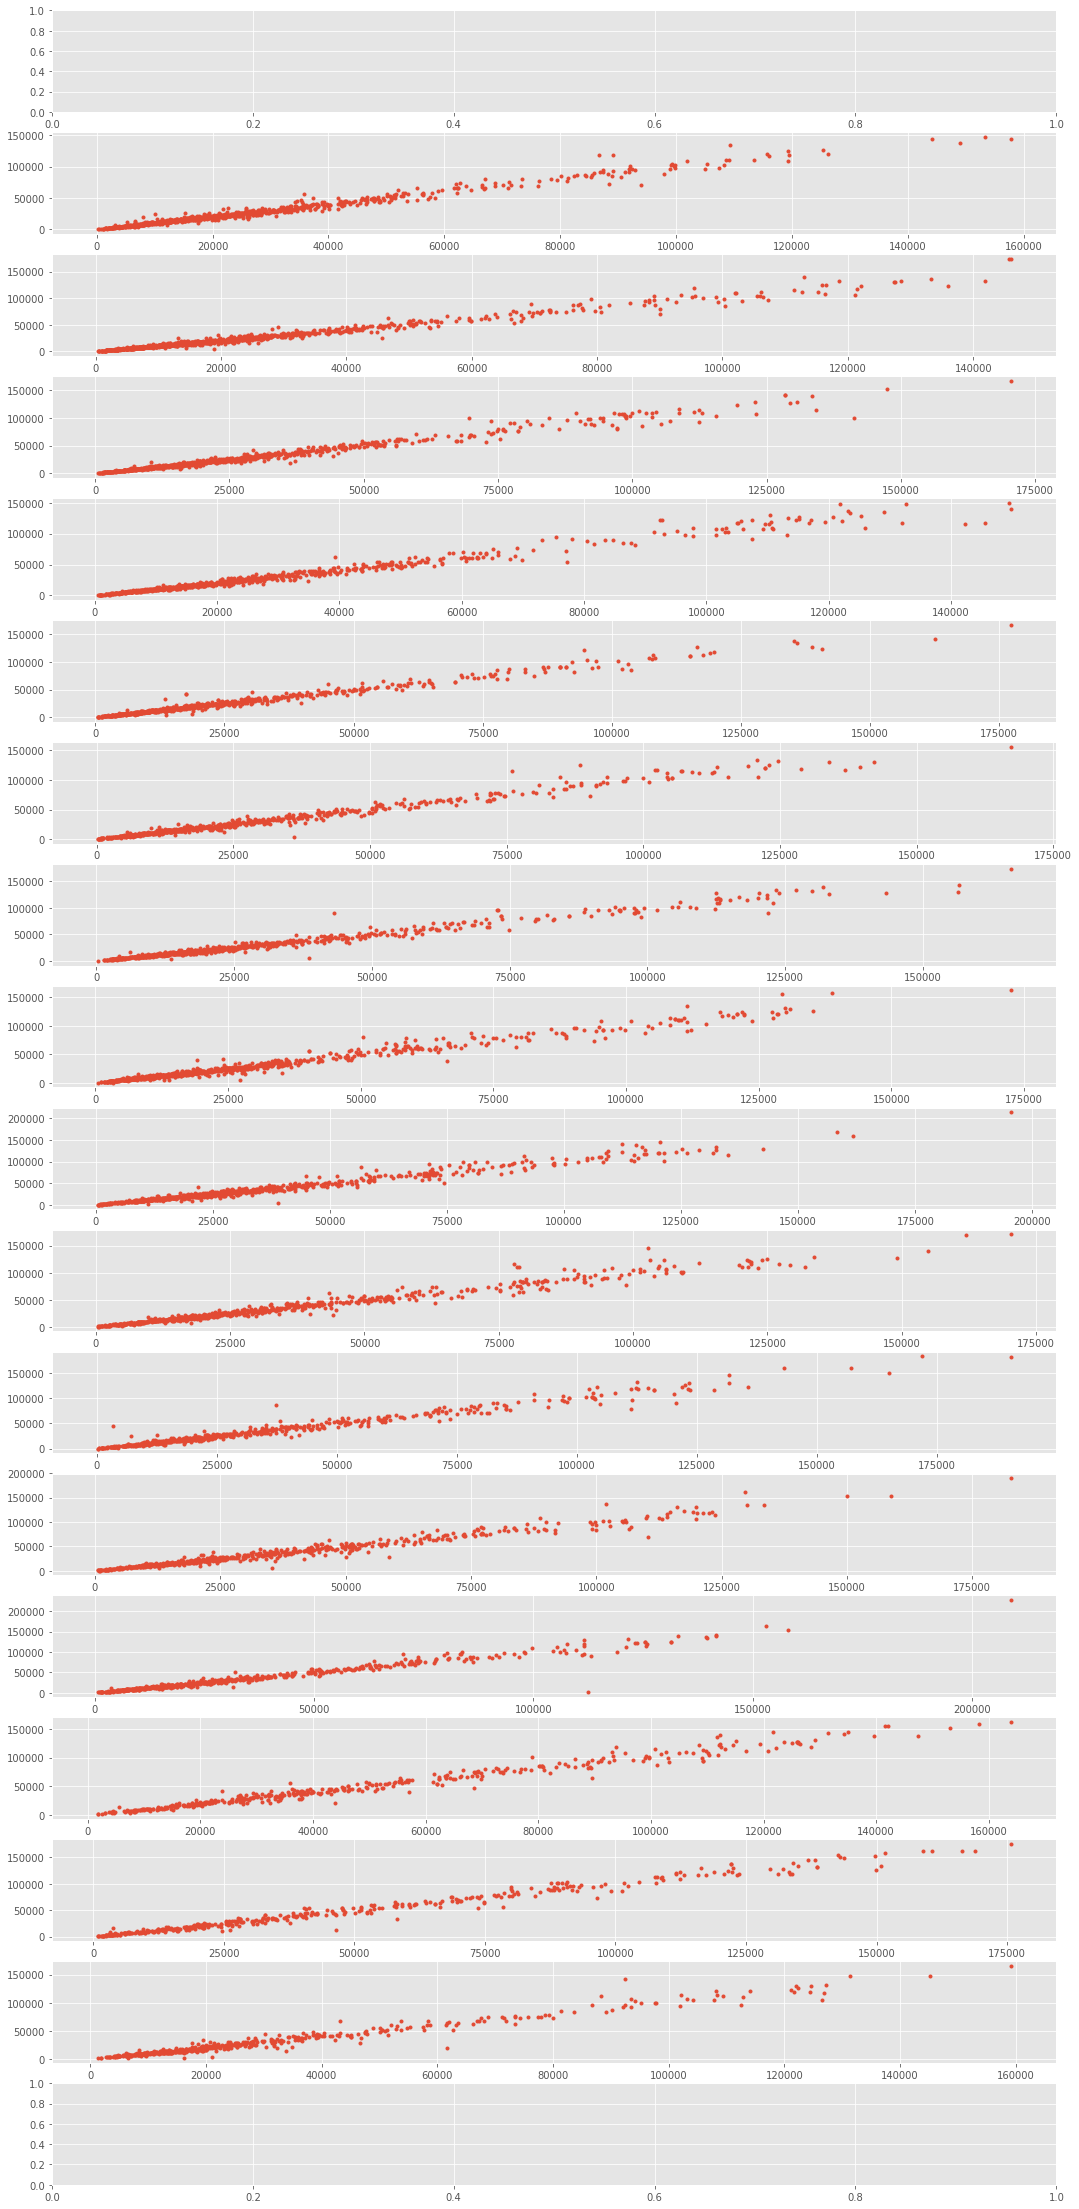

In [29]:

#run this cell
fig, axs = plt.subplots(18, figsize = (18,40))

model_of_model_scores = np.zeros(num_years)

for d in range(num_years):
    i = d + 1
    forest2.fit(X_estimated,y_estimated_flow)
    model_of_model_scores[d] = forest2.score(X_counted[counted_test[i].astype(bool)],y_counted_flow[counted_test[i].astype(bool)])
    axs[i].plot(forest2.predict(X_counted[counted_test[i].astype(bool)]),y_counted_flow[counted_test[i].astype(bool)],".")

In [30]:
model_of_model_scores

array([0.97976648, 0.97938183, 0.97694066, 0.97718318, 0.97935616,
       0.97793276, 0.97555853, 0.97456309, 0.96968235, 0.96864486,
       0.97046133, 0.96821235, 0.96263422, 0.975827  , 0.98207744,
       0.9670712 ])

In [32]:
my_model_scores

array([0.98034137, 0.98198541, 0.9822282 , 0.98150855, 0.98102876,
       0.98147981, 0.97848905, 0.975527  , 0.97380711, 0.98081753,
       0.97159552, 0.9747589 , 0.96424687, 0.97848301, 0.98021787,
       0.97321194])

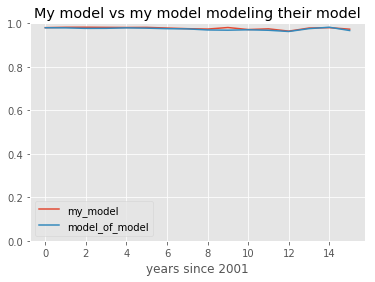

In [49]:
x= range(num_years)

plt.axis(ylim=(0,1))
plt.plot(x, my_model_scores)
plt.plot(x, model_of_model_scores)
plt.legend(['my_model','model_of_model'])
plt.title('My model vs my model modeling their model')
plt.ylim(0,1)
plt.xlabel('years since 2001')
None

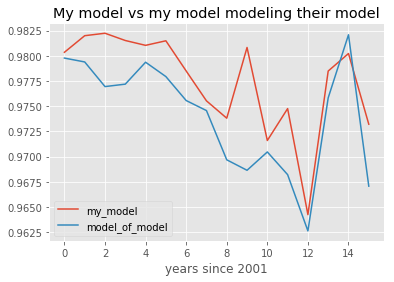

In [50]:
x= range(num_years)

plt.axis(ylim=(0,1))
plt.plot(x, my_model_scores)
plt.plot(x, model_of_model_scores)
plt.legend(['my_model','model_of_model'])
plt.title('My model vs my model modeling their model')
plt.xlabel('years since 2001')
None

In [51]:
my_model_scores

array([0.98034137, 0.98198541, 0.9822282 , 0.98150855, 0.98102876,
       0.98147981, 0.97848905, 0.975527  , 0.97380711, 0.98081753,
       0.97159552, 0.9747589 , 0.96424687, 0.97848301, 0.98021787,
       0.97321194])

In [52]:
model_of_model_scores

array([0.97976648, 0.97938183, 0.97694066, 0.97718318, 0.97935616,
       0.97793276, 0.97555853, 0.97456309, 0.96968235, 0.96864486,
       0.97046133, 0.96821235, 0.96263422, 0.975827  , 0.98207744,
       0.9670712 ])